In [21]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import forestci as fci
import sklearn.model_selection as xval

In [22]:
#Heart rate
#GROUP A
p1_hr = [108, 106, 108, 108, 107]
p3_hr = [95, 98, 99, 98, 103]
p4_hr = [67, 73, 67, 72, 69]
p12_hr = [75, 75, 74, 77, 74]
p13_hr = [65, 68, 67, 68, 65]
p14_hr = [81, 78, 79, 79, 79]

#GROUP B
p2_hr = [142, 145, 144, 144, 148]
p5_hr = [149, 148, 149, 153, 152]
p7_hr = [126, 143, 148, 151, 156]
p8_hr = [144, 147, 146, 152, 154]
p10_hr = [157, 157, 164, 155, 161]
p11_hr = [140, 145, 149, 151, 151]

#Impulse
p1_tf = [234, 413, 420, 526, 508]
p2_tf = [86, 113, 88, 117, 104]
p3_tf = [403, 276, 312, 337, 301]
p4_tf = [59, 51, 72, 51, 61]
p5_tf = [92, 67, 79, 60, 59]
p7_tf = [192, 125, 270, 317, 394]
p8_tf = [149, 127, 169, 166, 123]
p10_tf = [84, 116, 128, 99, 110]
p11_tf = [134, 91, 105, 148, 110]
p12_tf = [293, 256, 174, 101, 114]
p13_tf = [201, 228, 256, 234, 366]
p14_tf = [128, 112, 117, 103, 65]

#DCM
p1_dcm = [3.749, 4.626, 4.16, 3.368, 10.404]
p2_dcm = [8.204, 3.576, 2.797, 4.56, 7.967]
p3_dcm = [4.616, 8.763, 2.668, 3.88, 5.025]
p4_dcm = [10.719, 6.465, 4.991, 2.8, 8.477]
p5_dcm = [8.846, 2.667, 8.385, 2.846, 2.951]
p7_dcm = [4.147, 11.55, 3.174, 5.285, 2.517]
p8_dcm = [7.093, 6.804, 8.621, 4.315, 2.69]
p10_dcm = [3.748, 3.094, 3.977, 2.873, 5.086]
p11_dcm = [2.6, 4.831, 3.012, 6.525, 2.843]
p12_dcm = [7.21, 8.563, 14.277, 11.8, 14.245]
p13_dcm = [2.672, 2.687, 10.262, 2.94, 10.132]
p14_dcm = [9.097, 4.512, 9.301, 4.535, 8.739]


################## Random Forest Regression ##################

X = np.array([(p1_hr[0], p1_tf[0]), (p2_hr[0], p2_tf[0]), (p3_hr[0], p3_tf[0]), (p4_hr[0], p4_tf[0]), (p5_hr[0], p5_tf[0]), (p7_hr[0], p7_tf[0]), (p8_hr[0], p8_tf[0]), (p10_hr[0], p10_tf[0]), (p11_hr[0], p11_tf[0]), (p12_hr[0], p12_tf[0]), (p13_hr[0], p13_tf[0]), (p14_hr[0], p14_tf[0]),
              (p1_hr[1], p1_tf[1]), (p2_hr[1], p2_tf[1]), (p3_hr[1], p3_tf[1]), (p4_hr[1], p4_tf[1]), (p5_hr[1], p5_tf[1]), (p7_hr[1], p7_tf[1]), (p8_hr[1], p8_tf[1]), (p10_hr[1], p10_tf[1]), (p11_hr[1], p11_tf[1]), (p12_hr[1], p12_tf[1]), (p13_hr[1], p13_tf[1]), (p14_hr[1], p14_tf[1]),
              (p1_hr[2], p1_tf[2]), (p2_hr[2], p2_tf[2]), (p3_hr[2], p3_tf[2]), (p4_hr[2], p4_tf[2]), (p5_hr[2], p5_tf[2]), (p7_hr[2], p7_tf[2]), (p8_hr[2], p8_tf[2]), (p10_hr[2], p10_tf[2]), (p11_hr[2], p11_tf[2]), (p12_hr[2], p12_tf[2]), (p13_hr[2], p13_tf[2]), (p14_hr[2], p14_tf[2]),
              (p1_hr[3], p1_tf[3]), (p2_hr[3], p2_tf[3]), (p3_hr[3], p3_tf[3]), (p4_hr[3], p4_tf[3]), (p5_hr[3], p5_tf[3]), (p7_hr[3], p7_tf[3]), (p8_hr[3], p8_tf[3]), (p10_hr[3], p10_tf[3]), (p11_hr[3], p11_tf[3]), (p12_hr[3], p12_tf[3]), (p13_hr[3], p13_tf[3]), (p14_hr[3], p14_tf[3]),
              (p1_hr[4], p1_tf[4]), (p2_hr[4], p2_tf[4]), (p3_hr[4], p3_tf[4]), (p4_hr[4], p4_tf[4]), (p5_hr[4], p5_tf[4]), (p7_hr[4], p7_tf[4]), (p8_hr[4], p8_tf[4]), (p10_hr[4], p10_tf[4]), (p11_hr[4], p11_tf[4]), (p12_hr[4], p12_tf[4]), (p13_hr[4], p13_tf[4]), (p14_hr[4], p14_tf[4])])

y = np.array([p1_dcm[0], p1_dcm[1], p1_dcm[2], p1_dcm[3], p1_dcm[4],
              p2_dcm[0], p2_dcm[1], p2_dcm[2], p2_dcm[3], p2_dcm[4],
              p3_dcm[0], p3_dcm[1], p3_dcm[2], p3_dcm[3], p3_dcm[4], 
              p4_dcm[0], p4_dcm[1], p4_dcm[2], p4_dcm[3], p4_dcm[4], 
              p5_dcm[0], p5_dcm[1], p5_dcm[2], p5_dcm[3], p5_dcm[4], 
              p7_dcm[0], p7_dcm[1], p7_dcm[2], p7_dcm[3], p7_dcm[4],
              p8_dcm[0], p8_dcm[1], p8_dcm[2], p8_dcm[3], p8_dcm[4],
              p10_dcm[0], p10_dcm[1], p10_dcm[2], p10_dcm[3], p10_dcm[4],
              p11_dcm[0], p11_dcm[1], p11_dcm[2], p11_dcm[3], p11_dcm[4],
              p12_dcm[0], p12_dcm[1], p12_dcm[2], p12_dcm[3], p12_dcm[4],
              p13_dcm[0], p13_dcm[1], p13_dcm[2], p13_dcm[3], p13_dcm[4],
              p14_dcm[0], p14_dcm[1], p14_dcm[2], p14_dcm[3], p14_dcm[4]])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

regressor = RandomForestRegressor(n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_depth=100, bootstrap=True)
regressor.fit(X_train, y_train)  


print("Random Forest Prediction", regressor.predict(X_test))
print("\nRandom Forest Feature importance", regressor.feature_importances_)
y_pred = regressor.predict(X_test)

print("\nMean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))  
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest Prediction [4.21149943 6.12595894 6.34173353 6.54412525 5.34600435 4.0759969
 5.4259157  4.97194694 7.21799849 5.99395184 7.44712847 5.97296231]

Random Forest Feature importance [0.34705681 0.65294319]

Mean Absolute Error: 2.6141327598856146
Mean Squared Error: 10.318924398886898
Root Mean Squared Error: 3.2123082664786233


[6.66081072 4.73017969 4.22085448 9.22553214 9.20479714 8.36307936
 5.59999621 5.39298458 4.13736417 8.6910595 ]
Y_TEST [3.88  2.843 3.748 2.672 4.991 2.94  6.804 7.093 3.977 8.477]
PRED [6.66081072 4.73017969 4.22085448 9.22553214 9.20479714 8.36307936
 5.59999621 5.39298458 4.13736417 8.6910595 ]


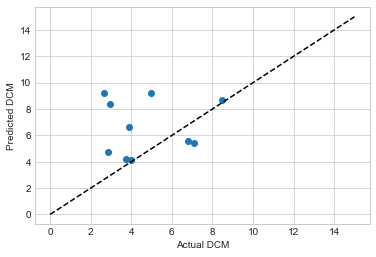

No calibration with n_samples <= 20
DCM UNBIASED [2.04864917 0.64761152 0.81691881 0.30239335 0.40712875 1.42651283
 0.87900792 0.85235645 0.66916237 1.39098462]
Variance [2.04864917 0.64761152 0.81691881 0.30239335 0.40712875 1.42651283
 0.87900792 0.85235645 0.66916237 1.39098462]
Standard deviation [4.19696343 0.41940068 0.66735635 0.09144174 0.16575382 2.03493884
 0.77265493 0.72651152 0.44777827 1.93483821]
Standard deviation 1.5359999999999998
SSSSSSSSSSSSSSSSSSSSSSSSSSSS [1.4313103  0.80474314 0.90383561 0.54990304 0.63806641 1.19436712
 0.93755422 0.92323153 0.81802345 1.17940011]


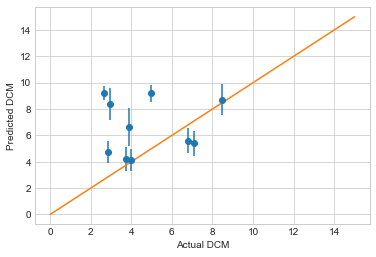


Mean Absolute Error: 2.460969639941742
Root Mean Squared Error: 3.256437041818238
FEATURE IMPORTANCE [0.81860912 0.18139088]


In [78]:

X = np.array([(p1_hr[0], p1_tf[0]), (p1_hr[1], p1_tf[1]), (p1_hr[2], p1_tf[2]), (p1_hr[3], p1_tf[3]), (p1_hr[4], p1_tf[4]),
              (p2_hr[0], p2_tf[0]), (p2_hr[1], p2_tf[1]), (p2_hr[2], p2_tf[2]), (p2_hr[3], p2_tf[3]), (p2_hr[4], p2_tf[4]),
              (p3_hr[0], p3_tf[0]), (p3_hr[1], p3_tf[1]), (p3_hr[2], p3_tf[2]), (p3_hr[3], p3_tf[3]), (p3_hr[4], p3_tf[4]),
              (p4_hr[0], p4_tf[0]), (p4_hr[1], p4_tf[1]), (p4_hr[2], p4_tf[2]), (p4_hr[3], p4_tf[3]), (p4_hr[4], p4_tf[4]),
              (p7_hr[0], p7_tf[0]), (p7_hr[1], p7_tf[1]), (p7_hr[2], p7_tf[2]), (p7_hr[3], p7_tf[3]), (p7_hr[4], p7_tf[4]),
              (p8_hr[0], p8_tf[0]), (p8_hr[1], p8_tf[1]), (p8_hr[2], p8_tf[2]), (p8_hr[3], p8_tf[3]), (p8_hr[4], p8_tf[4]),
              (p10_hr[0], p10_tf[0]), (p10_hr[1], p10_tf[1]), (p10_hr[2], p10_tf[2]), (p10_hr[3], p10_tf[3]), (p10_hr[4], p10_tf[4]),
              (p11_hr[0], p11_tf[0]), (p11_hr[1], p11_tf[1]), (p11_hr[2], p11_tf[2]), (p11_hr[3], p11_tf[3]), (p11_hr[4], p11_tf[4]),
              (p12_hr[0], p12_tf[0]), (p12_hr[1], p12_tf[1]), (p12_hr[2], p12_tf[2]), (p12_hr[3], p12_tf[3]), (p12_hr[4], p12_tf[4]),
              (p13_hr[0], p13_tf[0]), (p13_hr[1], p13_tf[1]), (p13_hr[2], p13_tf[2]), (p13_hr[3], p13_tf[3]), (p13_hr[4], p13_tf[4])
             ])

y = np.array([p1_dcm[0], p1_dcm[1], p1_dcm[2], p1_dcm[3], p1_dcm[4],
              p2_dcm[0], p2_dcm[1], p2_dcm[2], p2_dcm[3], p2_dcm[4],
              p3_dcm[0], p3_dcm[1], p3_dcm[2], p3_dcm[3], p3_dcm[4], 
              p4_dcm[0], p4_dcm[1], p4_dcm[2], p4_dcm[3], p4_dcm[4],  
              p7_dcm[0], p7_dcm[1], p7_dcm[2], p7_dcm[3], p7_dcm[4],
              p8_dcm[0], p8_dcm[1], p8_dcm[2], p8_dcm[3], p8_dcm[4],
              p10_dcm[0], p10_dcm[1], p10_dcm[2], p10_dcm[3], p10_dcm[4],
              p11_dcm[0], p11_dcm[1], p11_dcm[2], p11_dcm[3], p11_dcm[4],
              p12_dcm[0], p12_dcm[1], p12_dcm[2], p12_dcm[3], p12_dcm[4],
              p13_dcm[0], p13_dcm[1], p13_dcm[2], p13_dcm[3], p13_dcm[4]])


x_test =np.array([(p14_hr[0], p14_tf[0]), (p14_hr[1], p14_tf[1]), (p14_hr[2], p14_tf[2]), (p14_hr[3], p14_tf[3]), (p14_hr[4], p14_tf[4]),
                  (p5_hr[0], p5_tf[0]), (p5_hr[1], p5_tf[1]), (p5_hr[2], p5_tf[2]), (p5_hr[3], p5_tf[3]), (p5_hr[4], p5_tf[4])])


X_train, X_test, y_train, y_test = xval.train_test_split(
                                    X, y,
                                    test_size=0.20,
                                    random_state=42
                                    )


regressor = RandomForestRegressor(n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_depth=100, bootstrap=True)
regressor.fit(X_train, y_train)  


pred = regressor.predict(X_test)

print(pred)

print("Y_TEST", y_test)
print("PRED", pred)


# Plot predicted MPG without error bars
plt.scatter(y_test, pred)
plt.plot([0, 15], [0, 15], 'k--')
plt.xlabel('Actual DCM')
plt.ylabel('Predicted DCM')
plt.show()


# Calculate the variance:
dcm_unbiased = fci.random_forest_error(regressor, X_train, X_test)
print("DCM UNBIASED", dcm_unbiased)


print("Variance", dcm_unbiased)
print("Standard deviation", (dcm_unbiased ** 2))

x_dev = 7+0.51+1.69+0.1+0.18+2.1+0.88+0.7+0.7+1.5
x_dev = x_dev / 10
print("Standard deviation", x_dev)
#Calculate standard deviation: 

print("SSSSSSSSSSSSSSSSSSSSSSSSSSSS", np.sqrt(dcm_unbiased))

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(y_test, pred, yerr=np.sqrt(dcm_unbiased), fmt='o')
plt.plot([0, 15], [0, 15])#, 'k--')
plt.xlabel('Actual DCM')
plt.ylabel('Predicted DCM')
plt.show()

#print("Mean Squared Error:", metrics.mean_squared_error(y_test, pred))  


print("\nMean Absolute Error:", metrics.mean_absolute_error(y_test, pred)) 


#Standard avvikelsen på prediktionerna 
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

print("FEATURE IMPORTANCE", regressor.feature_importances_)

#print("Random forest score", regressor.score(X, y))
#prediction = regressor.predict(x_test)
#print("Prediction", prediction)

#print("\nRandom Forest Feature importance", regressor.feature_importances_)

 



#mpg_V_IJ_unbiased = fci.random_forest_error(regressor, X, x_test)

#print(mpg_V_IJ_unbiased)
### Vad den ska predicta.
#p14_dcm = [9.097, 4.512, 9.301, 4.535, 8.739]
#p5_dcm = [8.846, 2.667, 8.385, 2.846, 2.951]

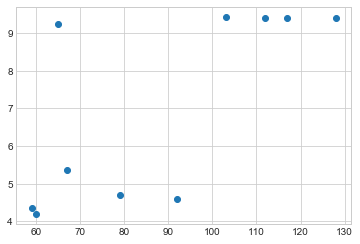

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

tf_14_x = [128, 112, 117, 103, 65, 92, 67, 79, 60, 59]
acc_14 = [9.4007339,  9.39672154, 9.41668346, 9.42430029, 9.2577852, 4.59587326,
 5.36775677, 4.69239851, 4.19917189, 4.34330525]

plt.scatter(tf_14_x, acc_14)
#plt.plot(tf_14_x, acc_14)
plt.show()
p5_tf = [92, 67, 79, 60, 59]
p5_hr = [149, 148, 149, 153, 152]
p14_hr = [81, 78, 79, 79, 79]